In [77]:
import pandas as pd
import numpy as np
%matplotlib inline

#load data
data_US = pd.read_csv('..//data//US_data.csv')

#clean price field
data_US['list_price'] = data_US['list_price'].str.replace('$','').astype(float)

In [78]:
data_US['theme_name'].unique()

array(['Angry Birds™', 'Architecture', 'BOOST', 'BrickHeadz', 'City',
       'Juniors', 'Classic', 'Creator 3-in-1', 'Creator Expert',
       'THE LEGO® BATMAN MOVIE', 'DC Comics™ Super Heroes', 'DIMENSIONS™',
       'DC Super Hero Girls', 'Disney™', 'DUPLO®', 'Elves', 'Friends',
       'Ghostbusters™', 'Ideas', 'Indoraptor Rampage at Lockwood Estate',
       'Carnotaurus Gyrosphere Escape', 'T. rex Transport',
       'Jurassic Park Velociraptor Chase', 'Dilophosaurus Outpost Attack',
       "Blue's Helicopter Pursuit", 'Stygimoloch Breakout',
       'Pteranodon Chase', 'Marvel Super Heroes', 'MINDSTORMS®',
       'Minecraft™', 'Minifigures', 'NEXO KNIGHTS™',
       'THE LEGO® NINJAGO® MOVIE™', 'NINJAGO®', 'SERIOUS PLAY®',
       'Speed Champions', 'Star Wars™', 'Technic', 'Power Functions'],
      dtype=object)

## to do

* fill mising data 
* handle age buckets
* digitize difficulty
* create new features
    * contains trademark
    * contains electronics

In [79]:
data_US['num_reviews'] = data_US['num_reviews'].fillna(0)

data_US['cont_lego'] = np.where(data_US['prod_desc'].str.contains('LEGO®'), 1, 0)

#data_US = data_US[data_US['review_difficulty'].notnull()]

review_map = {
    
    'Very Easy':1,
    'Easy':2,
    'Average':3,
    'Challenging':4
    
}

data_US['review_diff_int'] = data_US['review_difficulty'].map(review_map)

data_US['cont_tm'] = np.where(data_US['set_name'].str.contains('™'),1 , 0)

In [80]:
data_US.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,cont_lego,review_diff_int,cont_tm
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,0,3.0,0
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,0,2.0,0
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,0,2.0,0
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,0,3.0,0
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,1,4.0,0


In [81]:
#select columns to use for model
#3data_use = data_US.loc[:,['list_price','piece_count','ages']]

data_US = data_US[data_US['ages'].notnull()]

In [84]:
#fill null values
data_US['piece_count'] = data_US['piece_count'].fillna(data_US['piece_count'].mean())

#use this when we have more info
#data_use['piece_count'] = data_use.groupby("ages").transform(lambda x: x.fillna(x.mean()))['piece_count']

#handle ages
data_US['ages'] = data_US['ages'].str.replace('½','')

data_US[['age_bot','age_top']] = data_US['ages'].str.split(r'-|\+', expand = True)
data_US['age_top'] = data_US['age_top'].replace('',22)
data_US['age_top'] = data_US['age_top'].fillna(22).astype(int)
data_US['age_top'] = np.where(data_US['age_top'] >22, 22, data_US['age_top'])
data_US['age_bot'] = data_US['age_bot'].fillna(2).astype(int)

#calc features from age
data_US['age_range'] = data_US['age_top'] - data_US['age_bot']
data_US['age_mean'] = (data_US['age_top'] + data_US['age_bot']) / 2

In [85]:
import nltk
from collections import Counter
from collections import defaultdict

all_parts = ['NNP', 'IN', 'NN', 'CC', 'VB', 'RP', 'DT', '.']

def get_parts_of_speech(prod_desc):
    
    tokens = nltk.word_tokenize(prod_desc)
    text = nltk.Text(tokens)
    tagged = nltk.pos_tag(text)

    counts = defaultdict(int)
    for word, tag in tagged:
        counts[tag] += 1
    total = sum(counts.values())
    #counts_norm = dict((el,0) for el in all_parts)
    counts_norm = dict((word, float(count)/total) for word,count in counts.items())
    #counts_norm = {word:float(count)/total for word,count in counts.items()}
    
    return counts_norm

#for part_of_speech in all_parts:
    
    #data_US[part_of_speech] = data_US['prod_desc'].apply(lambda x: get_parts_of_speech(x)[part_of_speech])
    
#data_US[part_of_speech] = data_US['prod_desc'].apply(lambda x: get_parts_of_speech(x)[part_of_speech])

#get_parts_of_speech(data_US['prod_desc'][2])

In [ ]:
data_US.plot(kind = 'scatter', x = 'age_mean', y = 'list_price');

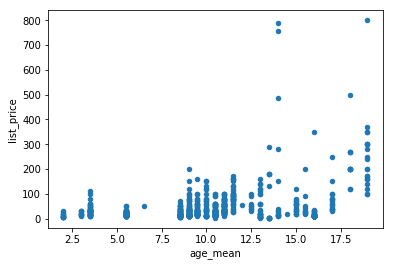

In [86]:
data_US.plot(kind = 'scatter', x = 'age_mean', y = 'list_price');

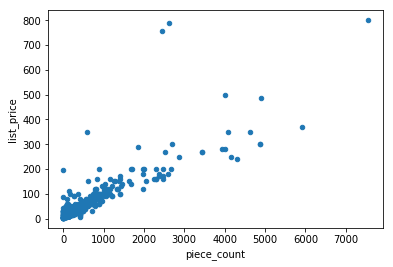

In [87]:
data_US.plot(kind = 'scatter', x = 'piece_count', y = 'list_price');

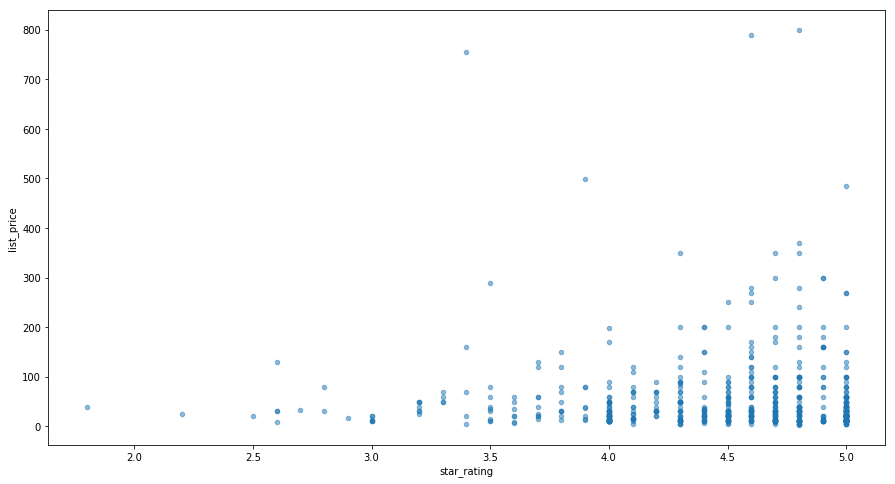

In [88]:
data_US.plot(kind = 'scatter', x = 'star_rating', y = 'list_price', alpha = .5, figsize = (15,8));

In [89]:
data_US['age_mean^2'] = data_US['age_mean'] ** 2
data_US['star_rating^2'] = data_US['star_rating'] ** 2

In [96]:
data_US = data_US[data_US['review_diff_int'].notnull()]
data_US = data_US[data_US['play_star_rating'].notnull()]
data_US = data_US[data_US['val_star_rating'].notnull()]

In [109]:
data_US.corr()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating,cont_lego,review_diff_int,cont_tm,age_bot,age_top,age_range,age_mean,age_mean^2,star_rating^2
list_price,1.000000,0.432105,0.861097,0.040639,0.450434,-0.008506,-0.065752,-0.013536,0.461562,-0.030591,0.453107,0.244610,-0.025543,0.345921,0.384371,-0.012045
num_reviews,0.432105,1.000000,0.548012,-0.038258,-0.030562,-0.003066,0.000478,-0.049441,0.292473,-0.006064,0.498369,0.290972,0.002302,0.395418,0.455376,-0.005240
piece_count,0.861097,0.548012,1.000000,0.039546,0.200195,0.067381,0.051763,-0.095908,0.530907,-0.047543,0.610705,0.314705,-0.055199,0.456028,0.502099,0.065560
play_star_rating,0.040639,-0.038258,0.039546,1.000000,-0.022185,0.597701,0.477964,-0.276779,0.156805,-0.137793,-0.205564,-0.280183,-0.222976,-0.272240,-0.279460,0.591154
prod_id,0.450434,-0.030562,0.200195,-0.022185,1.000000,-0.076106,-0.089720,0.106866,-0.020201,0.025519,-0.013783,0.121277,0.179210,0.077188,0.049938,-0.076845
star_rating,-0.008506,-0.003066,0.067381,0.597701,-0.076106,1.000000,0.747765,0.045202,0.079438,-0.117565,0.063923,0.056523,0.026914,0.063802,0.093117,0.995056
val_star_rating,-0.065752,0.000478,0.051763,0.477964,-0.089720,0.747765,1.000000,0.025539,0.070619,-0.092996,0.039880,0.035759,0.017478,0.040143,0.065265,0.747227
cont_lego,-0.013536,-0.049441,-0.095908,-0.276779,0.106866,0.045202,0.025539,1.000000,-0.225044,0.053530,0.125861,0.510318,0.606135,0.397530,0.424751,0.053612
review_diff_int,0.461562,0.292473,0.530907,0.156805,-0.020201,0.079438,0.070619,-0.225044,1.000000,-0.110457,0.432222,0.086320,-0.228163,0.229797,0.226905,0.076764
cont_tm,-0.030591,-0.006064,-0.047543,-0.137793,0.025519,-0.117565,-0.092996,0.053530,-0.110457,1.000000,0.121567,0.076653,0.008429,0.100322,0.068349,-0.123483


In [107]:
import statsmodels.api as sm

target = 'list_price'

features = [
    
    'piece_count',
    'age_mean',
    'age_mean^2',
    #'num_reviews',
    #'cont_tm',
    'cont_lego',
    'star_rating',
    'star_rating^2',
    #'val_star_rating',
    #'play_star_rating',
    'review_diff_int'
    
]

model = sm.OLS(data_US[target], data_US[features]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     506.1
Date:                Sat, 21 Apr 2018   Prob (F-statistic):          4.35e-267
Time:                        20:53:07   Log-Likelihood:                -3511.8
No. Observations:                 698   AIC:                             7038.
Df Residuals:                     691   BIC:                             7069.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
piece_count         0.0939      0.003     35.801      0.000       0.089       0.099
age_mean            0.7112      1.904      0.374      0.709      -3.027       4.449
age_mean^2         -0.1783      0.087     -2.042      0.042      -0.350      -0.007
cont_lego          28.4231      4.128      6.885      0.000      20.318      36.528
star_rating        17.0037      6.546      2.597      0.010       4.150      29.857
star_rating^2      -3.3453      1.019     -3.282      0.001      -5.347      -1.344
review_diff_int     3.4034      2.100      1.621      0.106      -0.720       7.527
==============================================================================
Omnibus:                     1023.915   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336097.634
Skew:                           8.018   Prob(JB):                         0.00
Kurtosis:                     109.298   Cond. No.                     4.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""